## Observations and Insights 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import dataframe_image as dfi 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [3]:
# Preview of the Mouse Meta Data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Preview of the Study Results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='left')

mouse_study_df.to_csv('data/mouse_study_df.csv')

In [6]:
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mice_count = pd.DataFrame(mouse_study_df.groupby(['Mouse ID'])).shape[0]
print(f'{mice_count} mice have been utilised in this study')

249 mice have been utilised in this study


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate_ID = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'])]
mouse_duplicate_ID



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_mouse_data = mouse_study_df[mouse_study_df['Mouse ID']=='g989']
print(f' Data on mouse g989 are as follows\n')
pd.DataFrame(g989_mouse_data).to_csv('data/g989_mouse_data.csv')
g989_mouse_data


 Data on mouse g989 are as follows



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# A new dataframe will be created by dropping the g989 mouse for subsequent analyses
cleaned_mouse_study_data = mouse_study_df[mouse_study_df['Mouse ID']!='g989']
cleaned_mouse_study_data.to_csv('data/cleaned_mouse_study.csv')
cleaned_mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
mice_recount = pd.DataFrame(cleaned_mouse_study_data.groupby(['Mouse ID'])).shape[0]

print(f'After dropping the g989 mouse from this study,\nthe number of mice that will be assessed are {mice_recount}')

After dropping the g989 mouse from this study,
the number of mice that will be assessed are 248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = cleaned_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

median = cleaned_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

variance = cleaned_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

stdev = cleaned_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

sem = cleaned_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_statistics = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Stdev': stdev,
    'SEM': sem
})

summary_statistics = summary_statistics.reset_index()
print(f'Summary Statistics for Drug Efficacy on Tumor Volume reduction')
summary_statistics


Summary Statistics for Drug Efficacy on Tumor Volume reduction


,Drug Regimen,Mean,Median,Variance,Stdev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
alternative_summary_statistics = cleaned_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

alternative_summary_statistics = alternative_summary_statistics.reset_index()

print(f'Summary Statistics for Drug Efficacy on Tumor Volume reduction')

alternative_summary_statistics.dfi.export('Images/1Summary_Statistics.png')

alternative_summary_statistics

Summary Statistics for Drug Efficacy on Tumor Volume reduction


,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

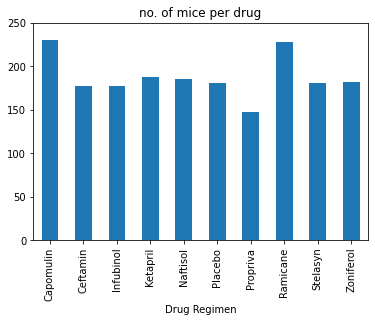

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_count = cleaned_mouse_study_data.groupby('Drug Regimen')['Mouse ID'].count()

mice_per_drug = pd.DataFrame(mice_count)
mice_per_drug = mice_per_drug.reset_index()

# Renaming the columns
mice_per_drug = mice_per_drug.rename(columns={'Mouse ID':'Mice Count'})

## Plotting AND saving the bar graph as an image using the Pandas Module
mice_per_drug.plot.bar(x='Drug Regimen',y='Mice Count',title='no. of mice per drug',legend=None, ylim = (0,250)).get_figure().savefig('Images/2bar_chart_pandas.png')





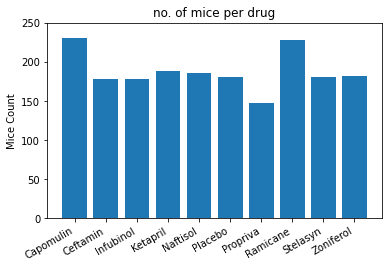

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Setting up the x-axis and y-axis in whic to plot the data
x_label = mice_per_drug['Drug Regimen']
y_label = mice_per_drug['Mice Count']

# Plotting the graph using the Matplotlib Pyplot Module
fig, ax1 = plt.subplots()
ax1.bar(x_label,y_label)
plt.ylabel('Mice Count')
plt.ylim(0,250)
plt.title('no. of mice per drug')
fig.autofmt_xdate()
plt.savefig('Images/3Bar_chart_pyplot.png')



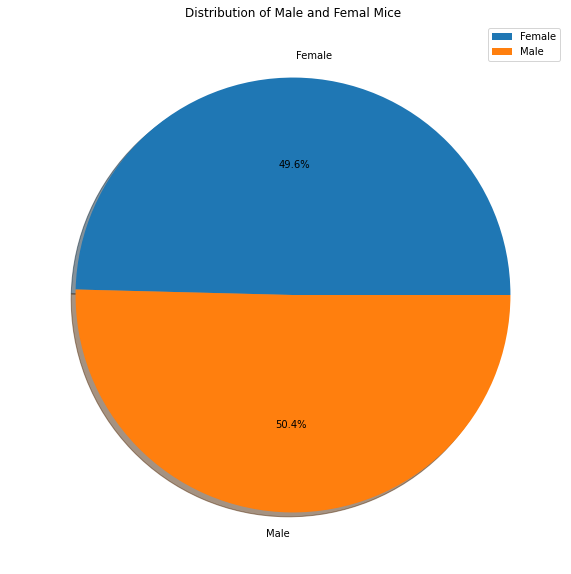

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

raw_mouse_gender = cleaned_mouse_study_data[['Mouse ID','Sex']].drop_duplicates().reset_index()

# Plotting AND Saving the pie chart image using the Pandas Module

raw_mouse_gender.groupby(['Sex']).count().plot(kind='pie',y='Mouse ID',title = 'Distribution of Male and Femal Mice', figsize =(15,10),autopct='%1.1f%%', shadow = True, ylabel = ' ').get_figure().savefig('Images/4Pie_chart_pandas.png')





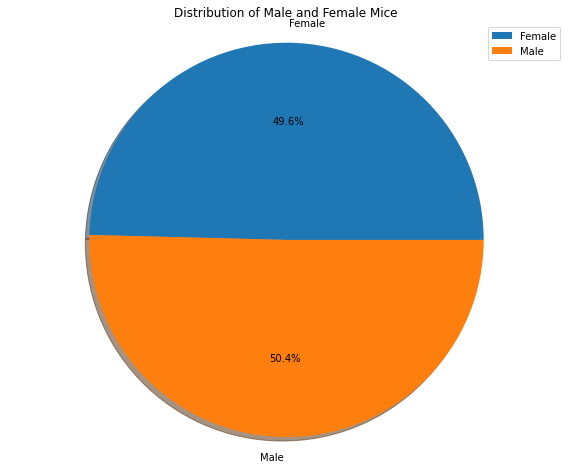

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Counting the number of female mice utilised in this study
female_mice = pd.DataFrame(cleaned_mouse_study_data[cleaned_mouse_study_data['Sex']=='Female'].groupby('Mouse ID')).shape[0]

# Counting the number of male mice utilised in this study
male_mice = pd.DataFrame(cleaned_mouse_study_data[cleaned_mouse_study_data['Sex']=='Male'].groupby('Mouse ID')).shape[0]

labels = 'Female','Male' 
mice_gender = [female_mice,male_mice]

# Plotting the graph
fig, ax1 = plt.subplots()
ax1.pie(mice_gender,labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
fig.set_size_inches(10,8)
ax1.legend()
plt.title('Distribution of Male and Female Mice')
plt.savefig('Images/5Pie_Chart_Pyplot.png')
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# A groupby function will be initited based on Mouse ID

Mouse_ID_groupy_Timepoint_max = pd.DataFrame(cleaned_mouse_study_data.groupby('Mouse ID').max()['Timepoint'])

Mouse_ID_groupy_Timepoint_max
# With the above Data Frame, we have done a groupby on Mouse ID to get the maximum timepoint for each mouse which will vary from 0-45



,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

new_mouse_study_df = pd.merge(Mouse_ID_groupy_Timepoint_max,

cleaned_mouse_study_data,on=('Mouse ID','Timepoint'),how='left')

new_mouse_study_df.to_csv('data/new_mouse_study_df.csv')




In [20]:
# We will need to clean the dataframe by selecting specifically for Capomulin, Ramicane, Infubinol, and Ceftamin
four_drug_treatments = new_mouse_study_df[(new_mouse_study_df['Drug Regimen']=='Capomulin')|(new_mouse_study_df['Drug Regimen']=='Ramicane')|(new_mouse_study_df['Drug Regimen']=='Infubinol')|(new_mouse_study_df['Drug Regimen']=='Ceftamin')]

# Dropping irrelevant columns
four_drug_treatments = four_drug_treatments.drop(['Sex','Age_months','Weight (g)','Metastatic Sites'], axis='columns')

four_drug_treatments.to_csv('data/four_drug_treatments.csv')

four_drug_treatments

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
3,a275,45,Ceftamin,62.999356
6,a411,45,Ramicane,38.407618
7,a444,45,Ramicane,43.047543
...,...,...,...,...
238,y769,45,Ceftamin,68.594745
239,y793,45,Capomulin,31.896238
240,y865,45,Ceftamin,64.729837
244,z578,45,Ramicane,30.638696


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# A For Loop will be utilised to calculate the IQR for each drug as well as determining if there are any outlier values for any of the drugs assessed.

for drug in drug_treatment:

    # Referring back to the Data Frame that contains the summary of the selected four drugs for further analyses. 
    tumor_volume = four_drug_treatments[four_drug_treatments['Drug Regimen']==drug]['Tumor Volume (mm3)']

    # The data being generated here will be used for the box plot.
    final_tumor_volume.append(tumor_volume)

    quartile = tumor_volume.quantile([0.25,0.5,0.75])

    # First Quartile
    Q1 = quartile[0.25]

    # Third Quartile
    Q3 = quartile[0.75]

    # Interquartile range
    IQR = Q3-Q1

    # Upper and Lower Bound values
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    # Determining if any outliers are present in any of the four drugs assessed.
    outliers = tumor_volume.loc[(tumor_volume<lower_bound)|(tumor_volume>upper_bound)]

    # Printing the statistical summary for each drug
    print(f'For {drug}\n')
    print(f'The First Quartile is {Q1}')
    print(f'The Third Quartile is {Q3}')
    print(f'The inter-quartile range is {IQR}')
    print(f'The lower bound value is {lower_bound}')
    print(f'The upper bound value is {upper_bound}')

    # The outliers will return a list of values if any are present, however for aesthetic purpsoses, if no values are present, then a message will be displayed indicating that the drug has so values. There is where an IF statement will be utilised.

    if len(outliers) > 0:
        print(f'The Outlier(s) for {drug} is {[o for o in outliers]}\n')
    else:
        print(f'There are no outliers for {drug}\n')


For Capomulin

The First Quartile is 32.37735684
The Third Quartile is 40.1592203
The inter-quartile range is 7.781863460000004
The lower bound value is 20.70456164999999
The upper bound value is 51.83201549
There are no outliers for Capomulin

For Ramicane

The First Quartile is 31.56046955
The Third Quartile is 40.65900627
The inter-quartile range is 9.098536719999998
The lower bound value is 17.912664470000003
The upper bound value is 54.30681135
There are no outliers for Ramicane

For Infubinol

The First Quartile is 54.04860769
The Third Quartile is 65.52574285
The inter-quartile range is 11.477135160000003
The lower bound value is 36.83290494999999
The upper bound value is 82.74144559000001
The Outlier(s) for Infubinol is [36.321345799999996]

For Ceftamin

The First Quartile is 48.72207785
The Third Quartile is 64.29983003
The inter-quartile range is 15.577752179999997
The lower bound value is 25.355449580000002
The upper bound value is 87.66645829999999
There are no outliers fo

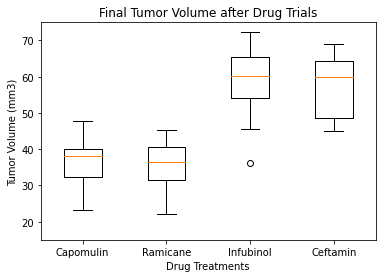

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Plotting the tumor volumes

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume after Drug Trials')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Treatments')
ax1.boxplot(final_tumor_volume, labels = drug_treatment)
ax1.set_ylim(15,75)
plt.savefig('Images/6Drug_efficacy_summary.png')
plt.show()



## Line and Scatter Plots

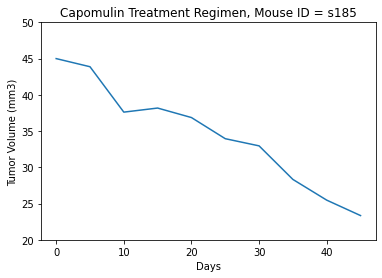

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


# We will need to refer to the old dataframe and filter out the neccessary information relevant to the question

capomulin_df = (mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']).drop(columns=['Sex','Weight (g)','Metastatic Sites','Age_months'])

# The s185 Mouse was selected to generate a line plot
s185_mouse = (capomulin_df[capomulin_df['Mouse ID']=='s185'])

# Generating a line plot of timepoint vs tumor volume
s185_timepoint = s185_mouse['Timepoint']
s185_tumor_volume = s185_mouse['Tumor Volume (mm3)']

plt.title('Capomulin Treatment Regimen, Mouse ID = s185')
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(20,50)
plt.plot(s185_timepoint,s185_tumor_volume)
plt.savefig('Images/7capomulin_treatment.png')
plt.show()


In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


# Creating the relevant dataframe to display the data as a scatter plot
raw_capomulin_data = cleaned_mouse_study_data[cleaned_mouse_study_data['Drug Regimen']=='Capomulin']

capomulin_weight_tm = pd.DataFrame(raw_capomulin_data.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean()).reset_index()

capomulin_weight_tm.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


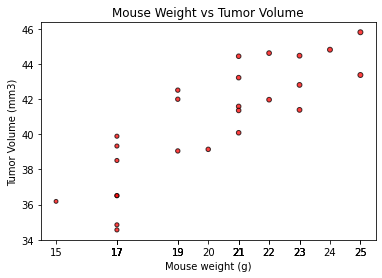

In [25]:
# Scatter Plot
x_axis = capomulin_weight_tm.iloc[:,1]
y_axis = capomulin_weight_tm.iloc[:,2]
plt.title('Mouse Weight vs Tumor Volume')
plt.xlabel('Mouse weight (g)')
plt.xticks(x_axis)
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(x_axis,y_axis, marker='o',facecolors='red',edgecolors='black', s=x_axis, alpha=0.75)
plt.savefig('Images/8mouse_weightvs_tumor_vol.png')
plt.show()

## Correlation and Regression

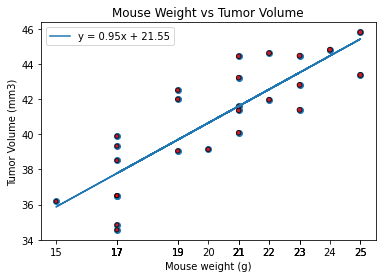

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Performing a linear regression on weight versus tumor volume
weight_slope, weight_int, weight_r, weight_p, weight_stderr = st.linregress(x_axis,y_axis)

line_eq = "y = " + str(round(weight_slope,2)) + "x + " + str(round(weight_int,2))

line_of_best_fit = x_axis * weight_slope + weight_int 

# Fitting the regression equation
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,line_of_best_fit)
plt.title('Mouse Weight vs Tumor Volume')
plt.xlabel('Mouse weight (g)')
plt.xticks(x_axis)
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(x_axis,y_axis, marker='o',facecolors='red',edgecolors='black', s=x_axis, alpha=0.75)
plt.legend([line_eq])
plt.savefig('Images/9mouse_weightvs_tumor_vol.png')
plt.show()


